# Timing squared Euclidean distance matrix functions

This code uses the magic function `%timeit`<sup> 1 2 </sup> to measure the excetution time of functions defined in `sedm.py`.

* <sup> 1 </sup>[Profiling and Timing Code - excerpt from the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

* <sup> 2 </sup>[Python documentation - timeit — Measure execution time of small code snippets](https://docs.python.org/3/library/timeit.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spt
import sedm
from tqdm.notebook import tqdm as tq # produce the progress bar

In [2]:
# number of points forming matrices P and S
N = np.array([10, 50, 100, 300, 500])

In [3]:
# functions in sedm
functions = [sedm.naive, 
             sedm.avoid_sqrt, 
             sedm.vectorized, 
             sedm.naive_numba,
             sedm.avoid_sqrt_numba]

# computational times for functions in sedm + scipy function + vectorized_dictionary
times = [[], [], [], [], [], [], []]

for Ni in tq(N):
    matrix = np.ones((3,Ni))
    for function, time in zip(functions, times):
        t = %timeit -o function(matrix, matrix)
        time.append(t.average)
    t = %timeit -o spt.distance.cdist(matrix.T, matrix.T, 'sqeuclidean')
    times[-2].append(t.average)
    matrix_dict = {
        'x' : matrix[0],
        'y' : matrix[1],
        'z' : matrix[2]
    }
    t = %timeit -o sedm.vectorized_dictionary(matrix_dict, matrix_dict)
    times[-1].append(t.average)

  0%|          | 0/5 [00:00<?, ?it/s]

199 µs ± 7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
91.1 µs ± 603 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
6.66 µs ± 14.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
16.8 µs ± 3.98 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.14 µs ± 6.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.63 µs ± 6.01 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
9.6 µs ± 26.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
5.08 ms ± 37.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.32 ms ± 3.85 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.4 µs ± 33.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
366 µs ± 676 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
117 µs ± 123 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
5.33 µs ± 6.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
17.6 µs ± 12.4 ns per loop (mean ± std. dev

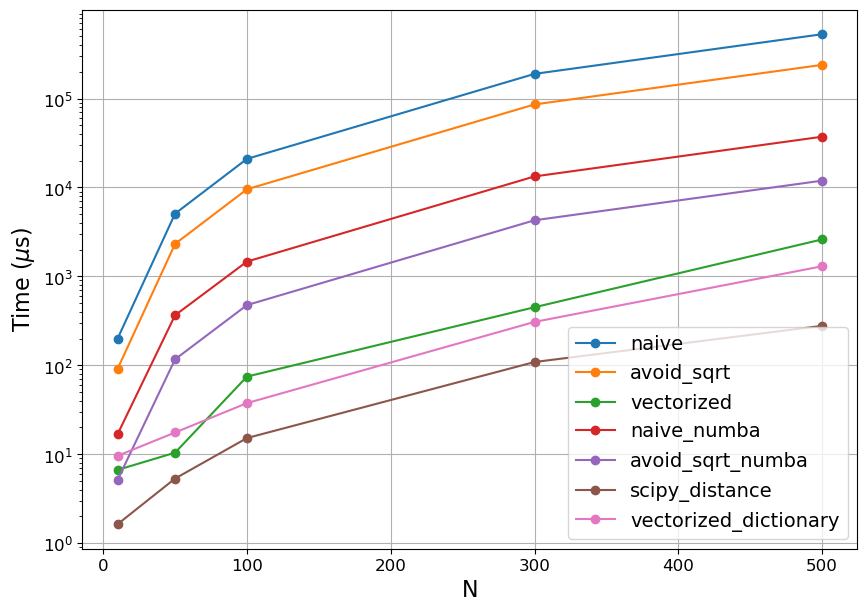

In [5]:
function_names = ['naive', 
                  'avoid_sqrt', 
                  'vectorized', 
                  'naive_numba',
                  'avoid_sqrt_numba',
                  'scipy_distance',
                  'vectorized_dictionary']

plt.figure(figsize=(10,7))
for function_name, time in zip(function_names, times):
    plt.plot(N, np.asarray(time)*1e6, 'o-', label = function_name)

plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()